Step 1: Dataset: Telephone Churn

Step 2: Objective:

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [3]:
# Loading data
df = pd.read_csv('telecom-dataset.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.shape

(3333, 21)

In [5]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [7]:
# Finding Missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [9]:
numerical = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls']

In [10]:
categorical = ['state', 'area code', 'international plan', 'voice mail plan', 'customer service calls', 'churn']

In [13]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [14]:
df.describe(include = ['object', 'bool'])

,state,phone number,international plan,voice mail plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,382-3966,no,no,False
freq,106,1,3010,2411,2850


In [15]:
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
MI     73
VT     73
ID     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NJ     68
NC     68
CO     66
WA     66
NV     66
RI     65
MA     65
MS     65
AZ     64
MO     63
FL     63
ND     62
NM     62
ME     62
OK     61
NE     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [16]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [17]:
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [18]:
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [19]:
df['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

In [20]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

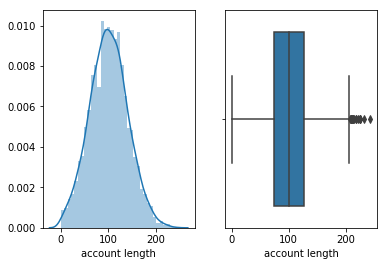

In [21]:
plt.subplot(121)
sns.distplot(df['account length'])
plt.subplot(122)
sns.boxplot(df['account length'])
plt.show()

In [22]:
plt.close()

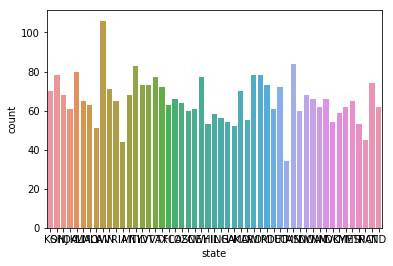

In [23]:
sns.countplot(df['state'])
plt.show()

In [25]:
# Contingency Table
pd.crosstab(df['churn'], df['state'])

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In [26]:
pd.crosstab(df['churn'], df['total intl calls'])

total intl calls,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
churn,,,,,,,,,,,,,,,,,,,,,
False,18,129,381,570,540,419,293,191,105,95,...,24,14,13,5,4,2,1,3,1,0
True,0,31,108,98,79,53,43,27,11,14,...,4,1,1,1,3,0,0,0,0,1


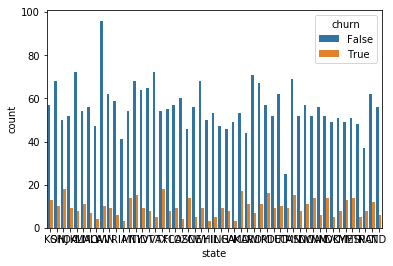

In [27]:
# Visualization
sns.countplot(x = 'state', hue = 'churn', data = df)
plt.show()

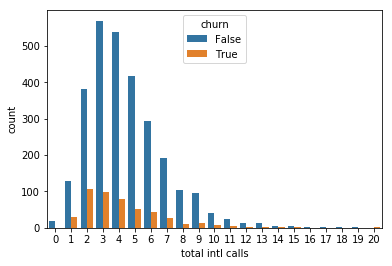

In [28]:
sns.countplot(x = 'total intl calls', hue = 'churn', data = df)
plt.show()

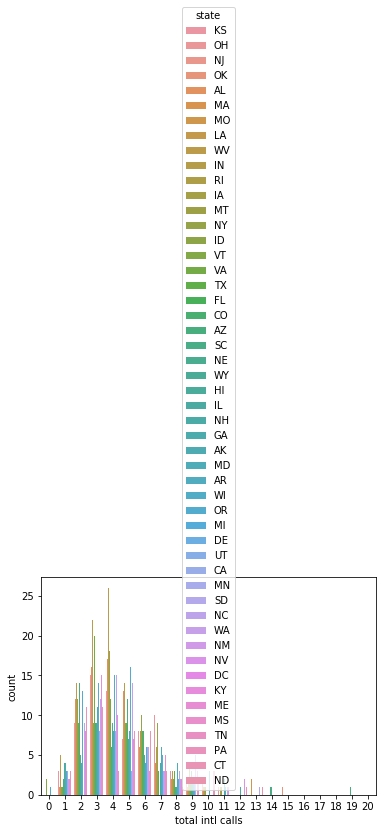

In [29]:
sns.countplot(x = 'total intl calls', hue = 'state', data = df)
plt.show()

In [30]:
# Creating correlation matrix
corr_matrix = df[numerical].corr()

In [31]:
print(corr_matrix)

                       account length  number vmail messages  \
account length               1.000000              -0.004628   
number vmail messages       -0.004628               1.000000   
total day minutes            0.006216               0.000778   
total day calls              0.038470              -0.009548   
total eve minutes           -0.006757               0.017562   
total eve calls              0.019260              -0.005864   
total night minutes         -0.008955               0.007681   
total night calls           -0.013176               0.007123   
total intl minutes           0.009514               0.002856   
total intl calls             0.020661               0.013957   

                       total day minutes  total day calls  total eve minutes  \
account length                  0.006216         0.038470          -0.006757   
number vmail messages           0.000778        -0.009548           0.017562   
total day minutes               1.000000         0.0067

In [32]:
sns.heatmap(corr_matrix)

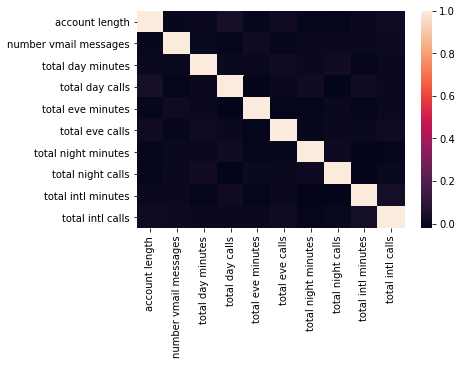

In [33]:
plt.show()

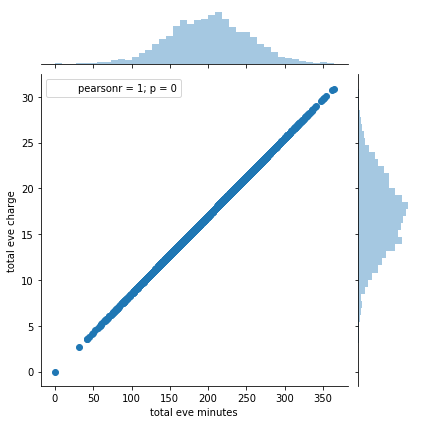

In [35]:
sns.jointplot(x = 'total eve minutes', y = 'total eve charge', data = df, kind= 'scatter')
plt.show()

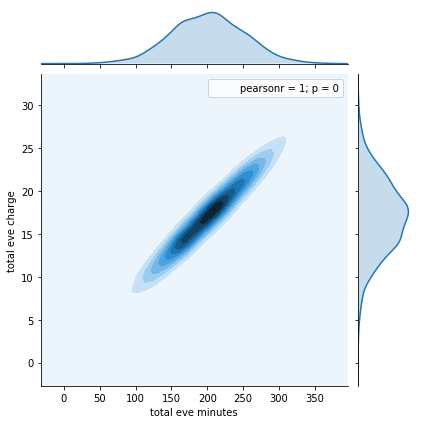

In [36]:
sns.jointplot(x = 'total eve minutes', y = 'total eve charge', data = df, kind= 'kde')
plt.show()

In [37]:
sns.pairplot(df[numerical])

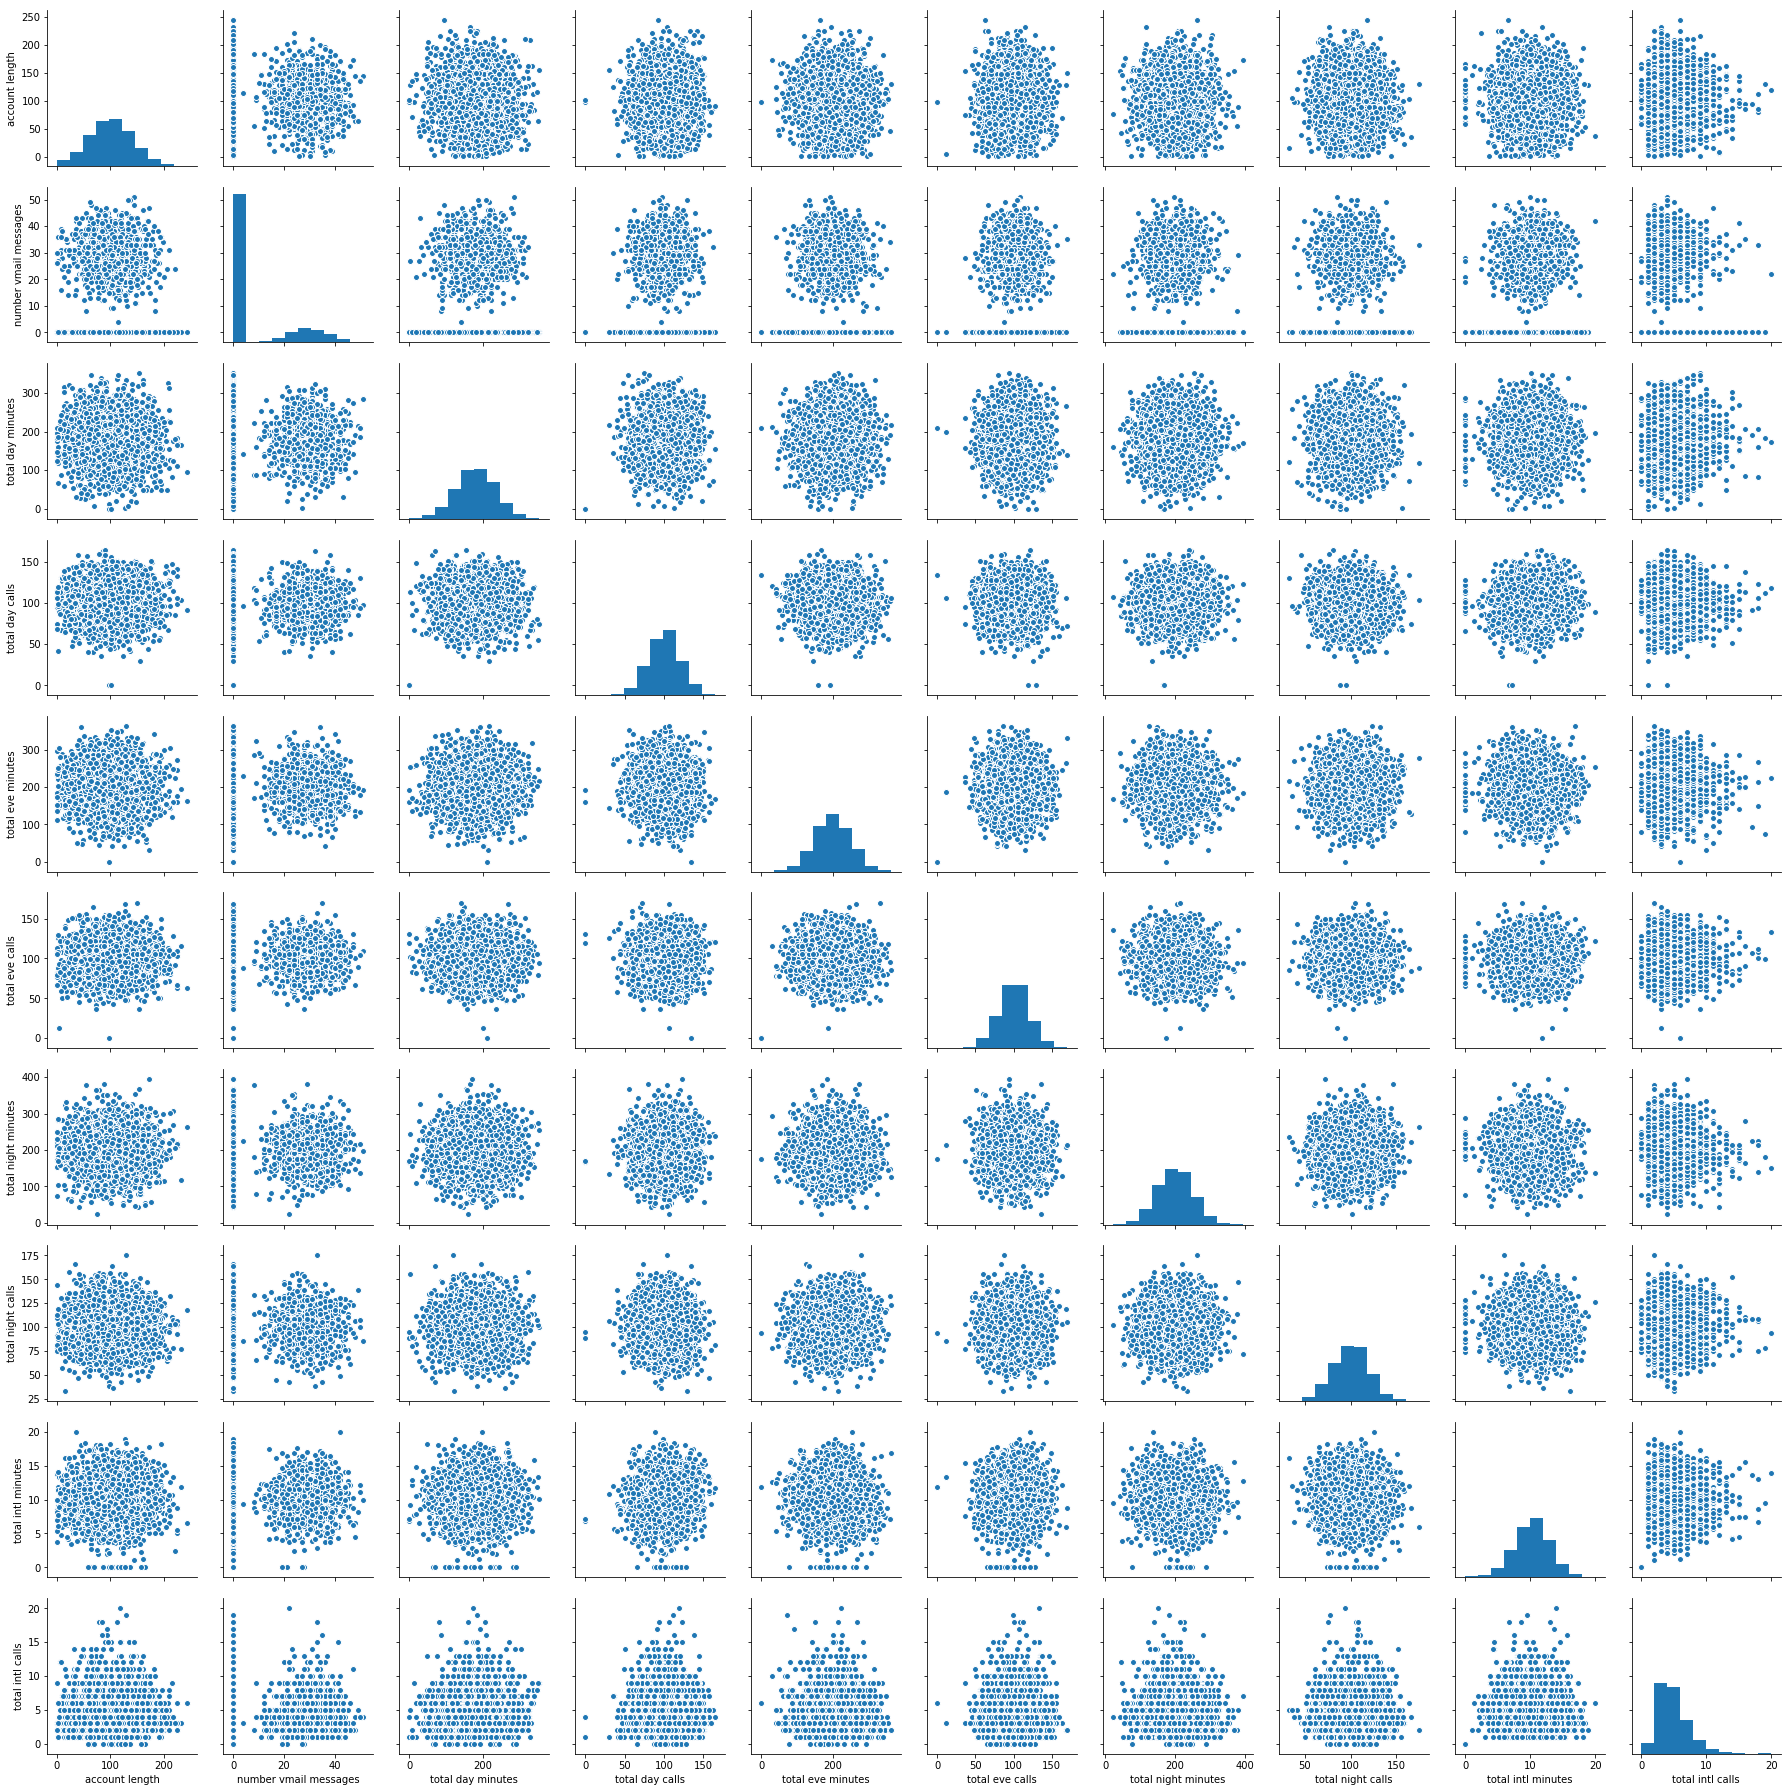

In [38]:
plt.show()

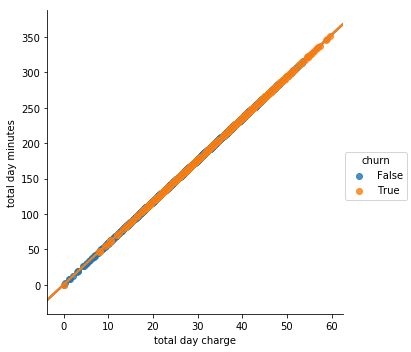

In [43]:
sns.lmplot('total day charge', 'total day minutes', data = df, hue = 'churn', fit_reg = True)
plt.show()